In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import copy, cv2,glob, shutil
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile

In [3]:
class mC(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
	     if(logs.get('accuracy') > 0.96):
	        self.model.stop_training = True
callbacks = mC()

In [4]:

lz = "/content/drive/MyDrive/MachineLearning/Rock-Paper-Scissors Images.zip"
zip_ref = zipfile.ZipFile(lz, 'r')
zip_ref.extractall('/tmp/rockpaperscissors')
zip_ref.close()

In [5]:
base_dir = '/tmp/rockpaperscissors'
t_dir = os.path.join(base_dir,'train') #/tmp/rockpaperscissors/train
val_dir = os.path.join(base_dir,'val')
roc_dir = os.path.join(base_dir,'rock')
pa_dir = os.path.join(base_dir,'paper')
sci_dir = os.path.join(base_dir,'scissors')

In [6]:
os.mkdir(t_dir)
os.mkdir(val_dir)

In [7]:
tr = os.path.join(t_dir, 'rock')#/tmp/rockpaperscissors/train/rock
tp = os.path.join(t_dir, 'paper')#/tmp/rockpaperscissors/train/paper
ts = os.path.join(t_dir, 'scissors') #/tmp/rockpaperscissors/train/scissors
vr = os.path.join(val_dir, 'rock')
vp = os.path.join(val_dir, 'paper')
vs = os.path.join(val_dir, 'scissors')

In [8]:
os.mkdir(tr)
os.mkdir(tp)
os.mkdir(ts)
os.mkdir(vr)
os.mkdir(vp)
os.mkdir(vs)

In [9]:
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pa_dir, val_pa_dir = train_test_split(os.listdir(pa_dir), test_size = 0.40)

In [10]:
for file in train_roc_dir:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(tr, file))
for file in val_roc_dir:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(vr,file))
for file in train_pa_dir:
    shutil.copy(os.path.join(pa_dir,file), os.path.join(tp,file))
for file in val_pa_dir:
    shutil.copy(os.path.join(pa_dir,file), os.path.join(vp,file))
for file in train_sci_dir:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(ts,file))
for file in val_sci_dir:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(vs,file))


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest'
)


train_generator = train_datagen.flow_from_directory(
    t_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
 	  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  	tf.keras.layers.MaxPooling2D(2,2),
	  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
	  tf.keras.layers.MaxPooling2D(2,2),
	  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
	  tf.keras.layers.MaxPooling2D(2,2),
	  tf.keras.layers.Flatten(),
	  tf.keras.layers.Dropout(0.5),
	  tf.keras.layers.Dense(512, activation= 'relu'),
	  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [12]:
model.summary()
model.compile(loss='categorical_crossentropy',
	optimizer=tf.optimizers.RMSprop(),
	metrics=['accuracy'])
history = model.fit(
	train_generator,
	steps_per_epoch = 41,
	epochs = 30,
	validation_data = val_generator,
	verbose =2,
	callbacks=[callbacks]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

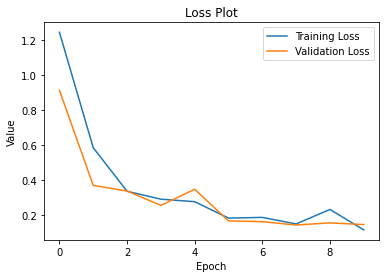

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

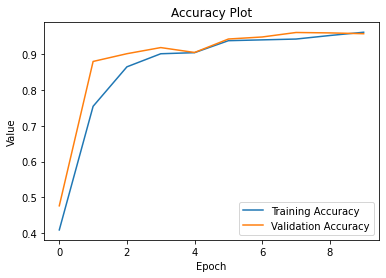

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 1wZUIsowmZRmESjh.png to 1wZUIsowmZRmESjh.png
1wZUIsowmZRmESjh.png
scissors


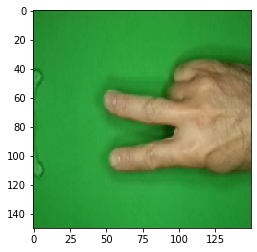

In [17]:
uploaded = files.upload()
for fn in uploaded.keys():
	path = fn
	img = image.load_img(path, target_size =(150,150))
	imgplot = plt.imshow(img)
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)

	images = np.vstack([x])
	classes = model.predict(images, batch_size=10)
	print(fn)
	if classes[0,0]!=0:
	   print('paper')
	elif classes[0,1]!=0:
  	   print('rock')
	else:
	   print('scissors')